In [1]:
import pandas as pd
import numpy as np

import pickle as pk
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

/home/felipe/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/felipe/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
pd.set_option("display.max_rows", 8)

In [3]:
df = pd.read_pickle("../../data/processed/df_20features_redshift.pkl")

In [9]:
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN100023,"[[6.984000000004016, 5.679, 6.387], [7.9920000...","[[7.00800000000163, 4.698, 7.145], [8.02300000...","[[0.0, 16.04, 17.59], [6.992000000005646, 19.8...","[[4.121000000006461, 18.01, 3.601], [7.0230000...","[0.0, 1.3437474747475018, 2.6874949494950036, ...","([2.7042034170117253, 2.704203379882798, 2.704...","([9.210984520892023, 9.176410057411523, 9.1395...","([18.95157959234684, 18.542994851548404, 18.12...","([11.511496784869301, 11.466555748878534, 11.4...","[5.408305555798485, 5.408350230206628, 5.40838...",...,47.475268,22.339358,-8.555147,-20.272573,9.800754,-27.230832,-3.424349,II,False,0.79264
SN100085,"[[0.0, 14.24, 18.69], [0.046999999998661224, 1...","[[9.245999999999185, 2.122, 2.955], [17.238000...","[[0.008000000001629815, 0.4534, 9.048], [23.03...","[[0.024000000004889444, 8.451, 7.696], [10.168...","[0.0, 1.2024545454545972, 2.4049090909091944, ...","([3.716529330659685, 3.5625686823335636, 3.356...","([0.22260948197979502, 0.3996793089433659, 0.5...","([0.013168490497364349, -0.0898721956550923, -...","([6.843383353229822, 6.685880257682825, 6.5058...","[3.8346626513696225, 5.304183229080858, 6.3480...",...,-11.987002,-29.304439,24.379562,44.752307,-17.355709,6.271127,52.140213,II,False,0.65600
SN100114,"[[0.2809999999954016, 6.707, 10.62], [5.260999...","[[0.0, 5.127, 5.467], [5.9799999999959255, 4.5...","[[5.277000000001863, 6.017, 3.299], [6.2609999...","[[4.987999999997555, 1.516, 8.327], [6.9879999...","[0.0, 1.1410505050505044, 2.282101010101009, 3...","([6.30179553883895, 6.163399755424116, 5.90410...","([4.501175940761371, 4.884878693958981, 5.2329...","([6.970237496131654, 6.258842555550748, 5.6350...","([12.16350518315572, 10.810842707072254, 9.097...","[18.458977393379286, 16.046616727416012, 13.67...",...,126.883803,-79.046296,323.571740,60.588944,-62.613276,-177.089830,71.567560,II,False,0.20095
SN100177,"[[6.980000000003201, 1.914, 2.033], [14.980000...","[[8.042999999997846, 0.01975, 3.008], [19.9800...","[[6.995999999999185, 0.4865, 1.444], [15.00400...","[[0.0, 0.9217, 3.049], [21.995999999999185, 5....","[0.0, 0.8466262626262514, 1.6932525252525028, ...","([1.139219526385169, 1.2164271451388768, 1.295...","([-0.7877409693040072, -0.7722841243756449, -0...","([-0.6894051675222933, -0.6382299020654087, -0...","([1.4328523933541817, 1.612303136114413, 1.794...","[8.772762795164342, 5.92446213264885, 3.746806...",...,33.713789,-29.794074,14.294094,37.541937,-8.246827,-35.067612,-3.614580,II,False,0.46557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN899766,"[[6.984000000004016, 2.619, 6.376], [21.973000...","[[0.012000000002444722, 48.86, 49.95], [8.0230...","[[0.0, 19.65, 17.59], [6.992000000005646, 5.34...","[[4.121000000006461, 1.07, 3.581], [7.02300000...","[0.0, 1.474707070707136, 2.949414141414272, 4....","([3.1774853444736557, 3.1774855699966595, 3.17...","([6.273860823260804, 6.090278522008031, 5.9044...","([8.309936227222874, 8.154384056314196, 7.9766...","([1.0347047221511048, 1.209742608349444, 1.388...","[6.3549756079875195, 6.354973557479621, 6.3549...",...,-22.871439,-85.058740,23.367325,86.632538,21.008687,-14.510971,64.077706,II,False,0.84069
SN899772,"[[0.0, 8.811, 25.57], [5.875, 1.341, 4.764], [...","[[0.8550000000032014, 10.26, 30.95], [21.81600...","[[0.015000000006693881, 7.061, 4.154], [32.820...","[[19.851000000002387, 3.151, 4.938], [27.85100...","[0.0, 1.6130000000000542, 3.2260000000001083, ...","([3.375523849152177, 2.9073715158475206, 2.313...","([5.9244796371948585, 5.563986512566748, 5.176...","([6.3162013263673575, 5.386246481590906, 4.336...","([11.990492759478087, 11.552298169626269, 11.0...","[3.341657653722518, 4.5430537588317765, 5.0680...",...,-66.440696,55.496760,-63.973373,-119.170704,23.982747,-77.691256,-40.448599,II,False,0.47005
SN899777,"[[0.0, 3.

In [4]:
splits = int(len(df)/1100)

X_real = df.loc[:,'f1':'f20']
y_real = np.array(df.REDSHIFT_SPEC)

kf_real = KFold(n_splits = splits)
X_true_test = []
X_to_train = []
y_true_test = []
y_to_train = []
for train_index_real, test_index_real in kf_real.split(X_real):
    print("X_true_test:", train_index_real, "X_to_train:", test_index_real)
    X_true_test.append(X_real.iloc[train_index_real])
    X_to_train.append(X_real.iloc[test_index_real])
    y_true_test.append(y_real[train_index_real])
    y_to_train.append(y_real[test_index_real])

X_true_test: [ 1113  1114  1115 ... 18913 18914 18915] X_to_train: [   0    1    2 ... 1110 1111 1112]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [1113 1114 1115 ... 2223 2224 2225]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [2226 2227 2228 ... 3336 3337 3338]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [3339 3340 3341 ... 4449 4450 4451]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [4452 4453 4454 ... 5562 5563 5564]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [5565 5566 5567 ... 6675 6676 6677]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [6678 6679 6680 ... 7788 7789 7790]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [7791 7792 7793 ... 8901 8902 8903]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: [ 8904  8905  8906 ... 10014 10015 10016]
X_true_test: [    0     1     2 ... 18913 18914 18915] X_to_train: 

In [7]:
len(X_true_test)

17

In [5]:
preds_arr = []
rmse_arr = []
matrices_arr = []
true_preds = []
true_rms = []
models = []

for i in range(len(X_true_test)):
    X_ = X_to_train[i]
    y_ = y_to_train[i]
    data_dmatrix = xgb.DMatrix(data=X_,label=y_)
    kf = KFold(n_splits = 5)
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    for train_index, test_index in kf.split(X_):
        X_train.append(X_.iloc[train_index])
        X_test.append(X_.iloc[test_index])
        y_train.append(y_[train_index])
        y_test.append(y_[test_index])
    
    for j in range(len(X_train)):
        xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10)
        xg_reg.fit(X_train[j],y_train[j])
        print("Fitting " + str(i) + str(j) + 'th model' )
        
        preds_arr.append(xg_reg.predict(X_test[j]))
        rmse_arr.append(np.sqrt(mean_squared_error(y_test[j], preds_arr[-1])))
        matrices_arr.append(np.round((abs(y_test[j]-preds_arr[-1])/y_test[j])*100))
        
        true_preds.append(xg_reg.predict(X_true_test[i]))
        true_rms.append(np.sqrt(mean_squared_error(y_true_test[i], true_preds[-1])))
        
        models.append(xg_reg)

[10:20:57] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 00th model
[10:20:57] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 01th model
[10:20:57] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 02th model
[10:20:57] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 03th model
[10:20:57] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 04th model
[10:20:57] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10th model
[10:20:57] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederro

[10:21:00] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 113th model
[10:21:00] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 114th model
[10:21:00] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 120th model
[10:21:01] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 121th model
[10:21:01] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 122th model
[10:21:01] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 123th model
[10:21:01] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squar

In [8]:
len(true_rms)

85

In [12]:
true_rms

[0.21540375165857148,
 0.21844376933435042,
 0.21581567093282203,
 0.21638661889471839,
 0.21607320424894091,
 0.22227557306057624,
 0.22245018602421104,
 0.22251334858521027,
 0.21996905527344163,
 0.2220629780560419,
 0.2148842188295587,
 0.2166000626974592,
 0.21446604281648082,
 0.21575687494009063,
 0.21477071106686216,
 0.21870993787529003,
 0.21541921385176294,
 0.215764884279458,
 0.2160564169660949,
 0.21779764804613383,
 0.21623119962381038,
 0.21568975215507422,
 0.21597126934082572,
 0.21576521057843642,
 0.2145453465026029,
 0.21329356093403193,
 0.21177491083620437,
 0.21489100579289433,
 0.21427782483172023,
 0.21260646005767722,
 0.21412281496344057,
 0.21551466009515974,
 0.21635716305379438,
 0.21542698183957362,
 0.21716552238098383,
 0.2175570297879746,
 0.21872423074723296,
 0.21864931233891458,
 0.2192945769679698,
 0.21827983897457814,
 0.21641350057071332,
 0.21870766587076265,
 0.2173263148889989,
 0.2175084417104568,
 0.21636618873906568,
 0.21582120316982487,

In [10]:
models

[XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=0, num_parallel_tree=1,
              objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None),
 XGBRegressor(alpha=10, base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_est

# Normal Linear Regression

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [48]:
from sklearn import linear_model

In [49]:
reg = linear_model.LinearRegression()

In [33]:
x = X_train[-1]

In [37]:
x['target'] = y_train[-1]

/home/felipe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
x

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
ID,,,,,,,,,,,,,,,,,,,,,
SN853870,-629.395000,303.270839,12.595323,33.698785,61.524145,107.912514,-16.591236,78.319608,54.015820,-25.883775,...,18.025200,23.240546,45.436183,-10.717777,51.434519,7.823082,14.069987,13.366617,18.941023,0.78647
SN853902,-403.577648,192.270572,155.156949,28.503750,48.944647,47.081357,43.389724,32.283089,46.477502,-26.778500,...,15.797907,0.430205,-0.923832,-22.369607,-30.614164,-44.732063,-0.913544,11.317149,-5.057367,0.57723
SN853969,-467.981212,347.719269,55.226117,-44.268730,187.833934,77.768725,-70.415631,44.665149,68.788016,-81.759981,...,26.117386,30.663687,79.998134,3.568942,47.505044,20.833676,-16.535656,10.688689,1.569014,0.82993
SN853988,206.697561,-922.440812,-687.318818,347.743523,374.290916,60.136555,-39.396776,-205.215301,131.837778,40.200574,...,-18.061148,-26.281115,-115.586944,239.899460,-36.647179,-140.957871,83.598433,187.608737,51.442211,0.53846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN889448,-651.160018,125.051448,-144.373569,99.733687,24.222243,87.587307,98.619099,75.010385,50.674811,-42.103153,...,-12.616121,-21.721253,-16.540688,-92.363507,21.027210,47.196277,-18.950516,-40.478649,-27.035689,0.93669
SN889502,-549.305606,363.176014,-48.513350,24.329160,5.761858,122.775215,-6.807005,68.983099,13.455541,-14.603582,...,15.827956,5.953496,20.170417,3.460617,-6.009495,-8.892416,-1.746711,-15.610291,-4.720978,0.44127
SN889601,-398.956615,167.277835,-42.545553,7.442509,8.130408,20.720640,35.182567,44.023975,-21.817749,-3.855144,...,0.394047,3.677997,15.461803,6.416959,-7.194665,29.776331,8.357631,36.651304,19.108292,0.50331
SN889642,-295.898559,297.202399,-34.125555,13.815035,35.849094,58.891053,-41.956630,1.834201,-111.401344,-28.097156,...,5.665985,4.035805,20.086595,49.950037,-31.388733,7.583459,9.997335,9.807498,-17.450555,0.91502


In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

col = x.columns
new_data = pd.DataFrame(data_scaled, columns=col)

In [40]:
new_data

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
0,-0.299377,0.246067,0.046648,0.156361,0.167691,0.369178,-0.036740,0.255811,0.119793,-0.252697,...,0.217492,0.108364,0.334935,-0.067897,0.477564,0.084738,0.053375,0.210261,0.242915,0.479799
1,-0.183171,0.168660,0.233068,0.136186,0.132883,0.177529,0.132998,0.112427,0.100193,-0.259776,...,0.194442,-0.018507,0.015335,-0.165903,-0.393953,-0.387040,-0.053500,0.182654,-0.092556,-0.431698
2,-0.216313,0.277063,0.102394,-0.146434,0.517193,0.274210,-0.189055,0.150992,0.158201,-0.694769,...,0.301236,0.149652,0.573201,0.052272,0.435826,0.201531,-0.164930,0.174188,0.000073,0.669120
3,0.130880,-0.608692,-0.868587,1.375988,1.033124,0.218659,-0.101276,-0.627280,0.322133,0.270137,...,-0.155957,-0.167075,-0.775138,2.040096,-0.458035,-1.250840,0.549311,2.557359,0.697245,-0.600589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.310578,0.121784,-0.158610,0.412815,0.064476,0.305143,0.289290,0.245504,0.111106,-0.381019,...,-0.099608,-0.141713,-0.092326,-0.754636,0.154579,0.438183,-0.182155,-0.515053,-0.399789,1.134191
887,-0.258163,0.287842,-0.033260,0.119973,0.013395,0.416003,-0.009052,0.226732,0.014334,-0.163453,...,0.194753,0.012214,0.160756,0.051360,-0.132603,-0.065314,-0.059443,-0.180068,-0.087854,-1.023971
888,-0.180793,0.151231,-0.025456,0.054392,0.019949,0.094479,0.109773,0.148995,-0.077377,-0.078415,...,0.035031,-0.000442,0.128295,0.076227,-0.145192,0.281808,0.012630,0.523913,0.245253,-0.753711
889,-0.127759,0.241835,-0.014446,0.079140,0.096647,0.214735,-0.108520,0.017591,-0.310298,-0.270209,...,0.089589,0.001548,0.160178,0.442392,-0.402180,0.082587,0.024326,0.162318,-0.265799,1.039792


In [24]:
learning_rate = 0.1 
interations = 1000 # número de interações

theta = np.array([0,0])

In [42]:
y = y_train[-1]

In [43]:
x = X_train[-1]

In [ ]:
col = ['Body Weight', 'Brain Weight']
new_data = pd.DataFrame(data_scaled, columns=col)

In [51]:
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
true_rms

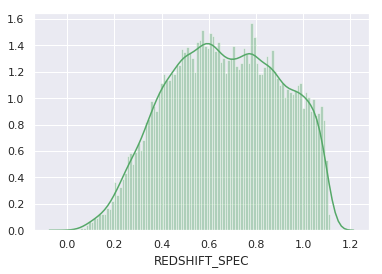

In [56]:
fig, ax = plt.subplots()
sns.distplot(df.REDSHIFT_SPEC, bins=100, color="g", ax=ax)
plt.show()

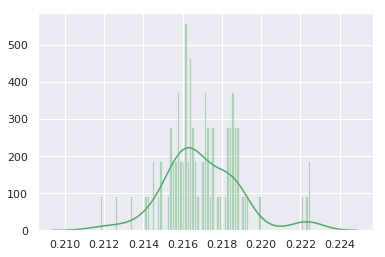

In [58]:
fig, ax = plt.subplots()
sns.distplot(true_rms, bins=85, color="g", ax=ax)
plt.show()

0.21177491083620437

In [65]:
((np.array(true_rms).max() - np.array(true_rms).min())/np.array(true_rms).max())*100

4.8259746290653105